# **Extracting Data**

In [ ]:
import pandas as pd

# Load the Excel file
excel_file = '/content/CSI_7_MAL_2324_CW_resit_data.xlsx'  # Replace 'your_file.xlsx' with the path to your Excel file
excel_data = pd.ExcelFile(excel_file)

# Parse each sheet into a separate DataFrame
sheet_names = excel_data.sheet_names
dfs = {}  # Dictionary to store DataFrames

for sheet_name in sheet_names:
    dfs[sheet_name] = pd.read_excel(excel_data, sheet_name)

# Access each DataFrame using its sheet name
data_df = dfs['Data']
cognitive_scores_df = dfs['Cognitive score']
diagnosis_df = dfs['Diagnosis target']

In [ ]:
cognitive_scores_df

,RID,Test_data,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting
0,2,0,0.0,10.67,18.67,28,44.0,4.0,6.0,54.5455
1,3,0,4.5,22.00,31.00,20,22.0,1.0,4.0,100.0000
2,4,1,1.0,14.33,21.33,27,37.0,7.0,4.0,36.3636
3,5,0,0.0,8.67,14.67,29,37.0,4.0,4.0,44.4444
4,6,0,0.5,18.67,25.67,25,30.0,1.0,5.0,83.3333
...,...,...,...,...,...,...,...,...,...,...
1732,5287,0,0.5,3.00,4.00,29,50.0,10.0,4.0,26.6667
1733,5295,0,0.5,11.00,18.00,29,28.0,4.0,4.0,50.0000
1734,5296,0,0.0,9.00,14.00,29,38.0,2.0,6.0,75.0000
1735,4264,1,0.0,3.00,6.00,29,48.0,7.0,13.0,100.0000


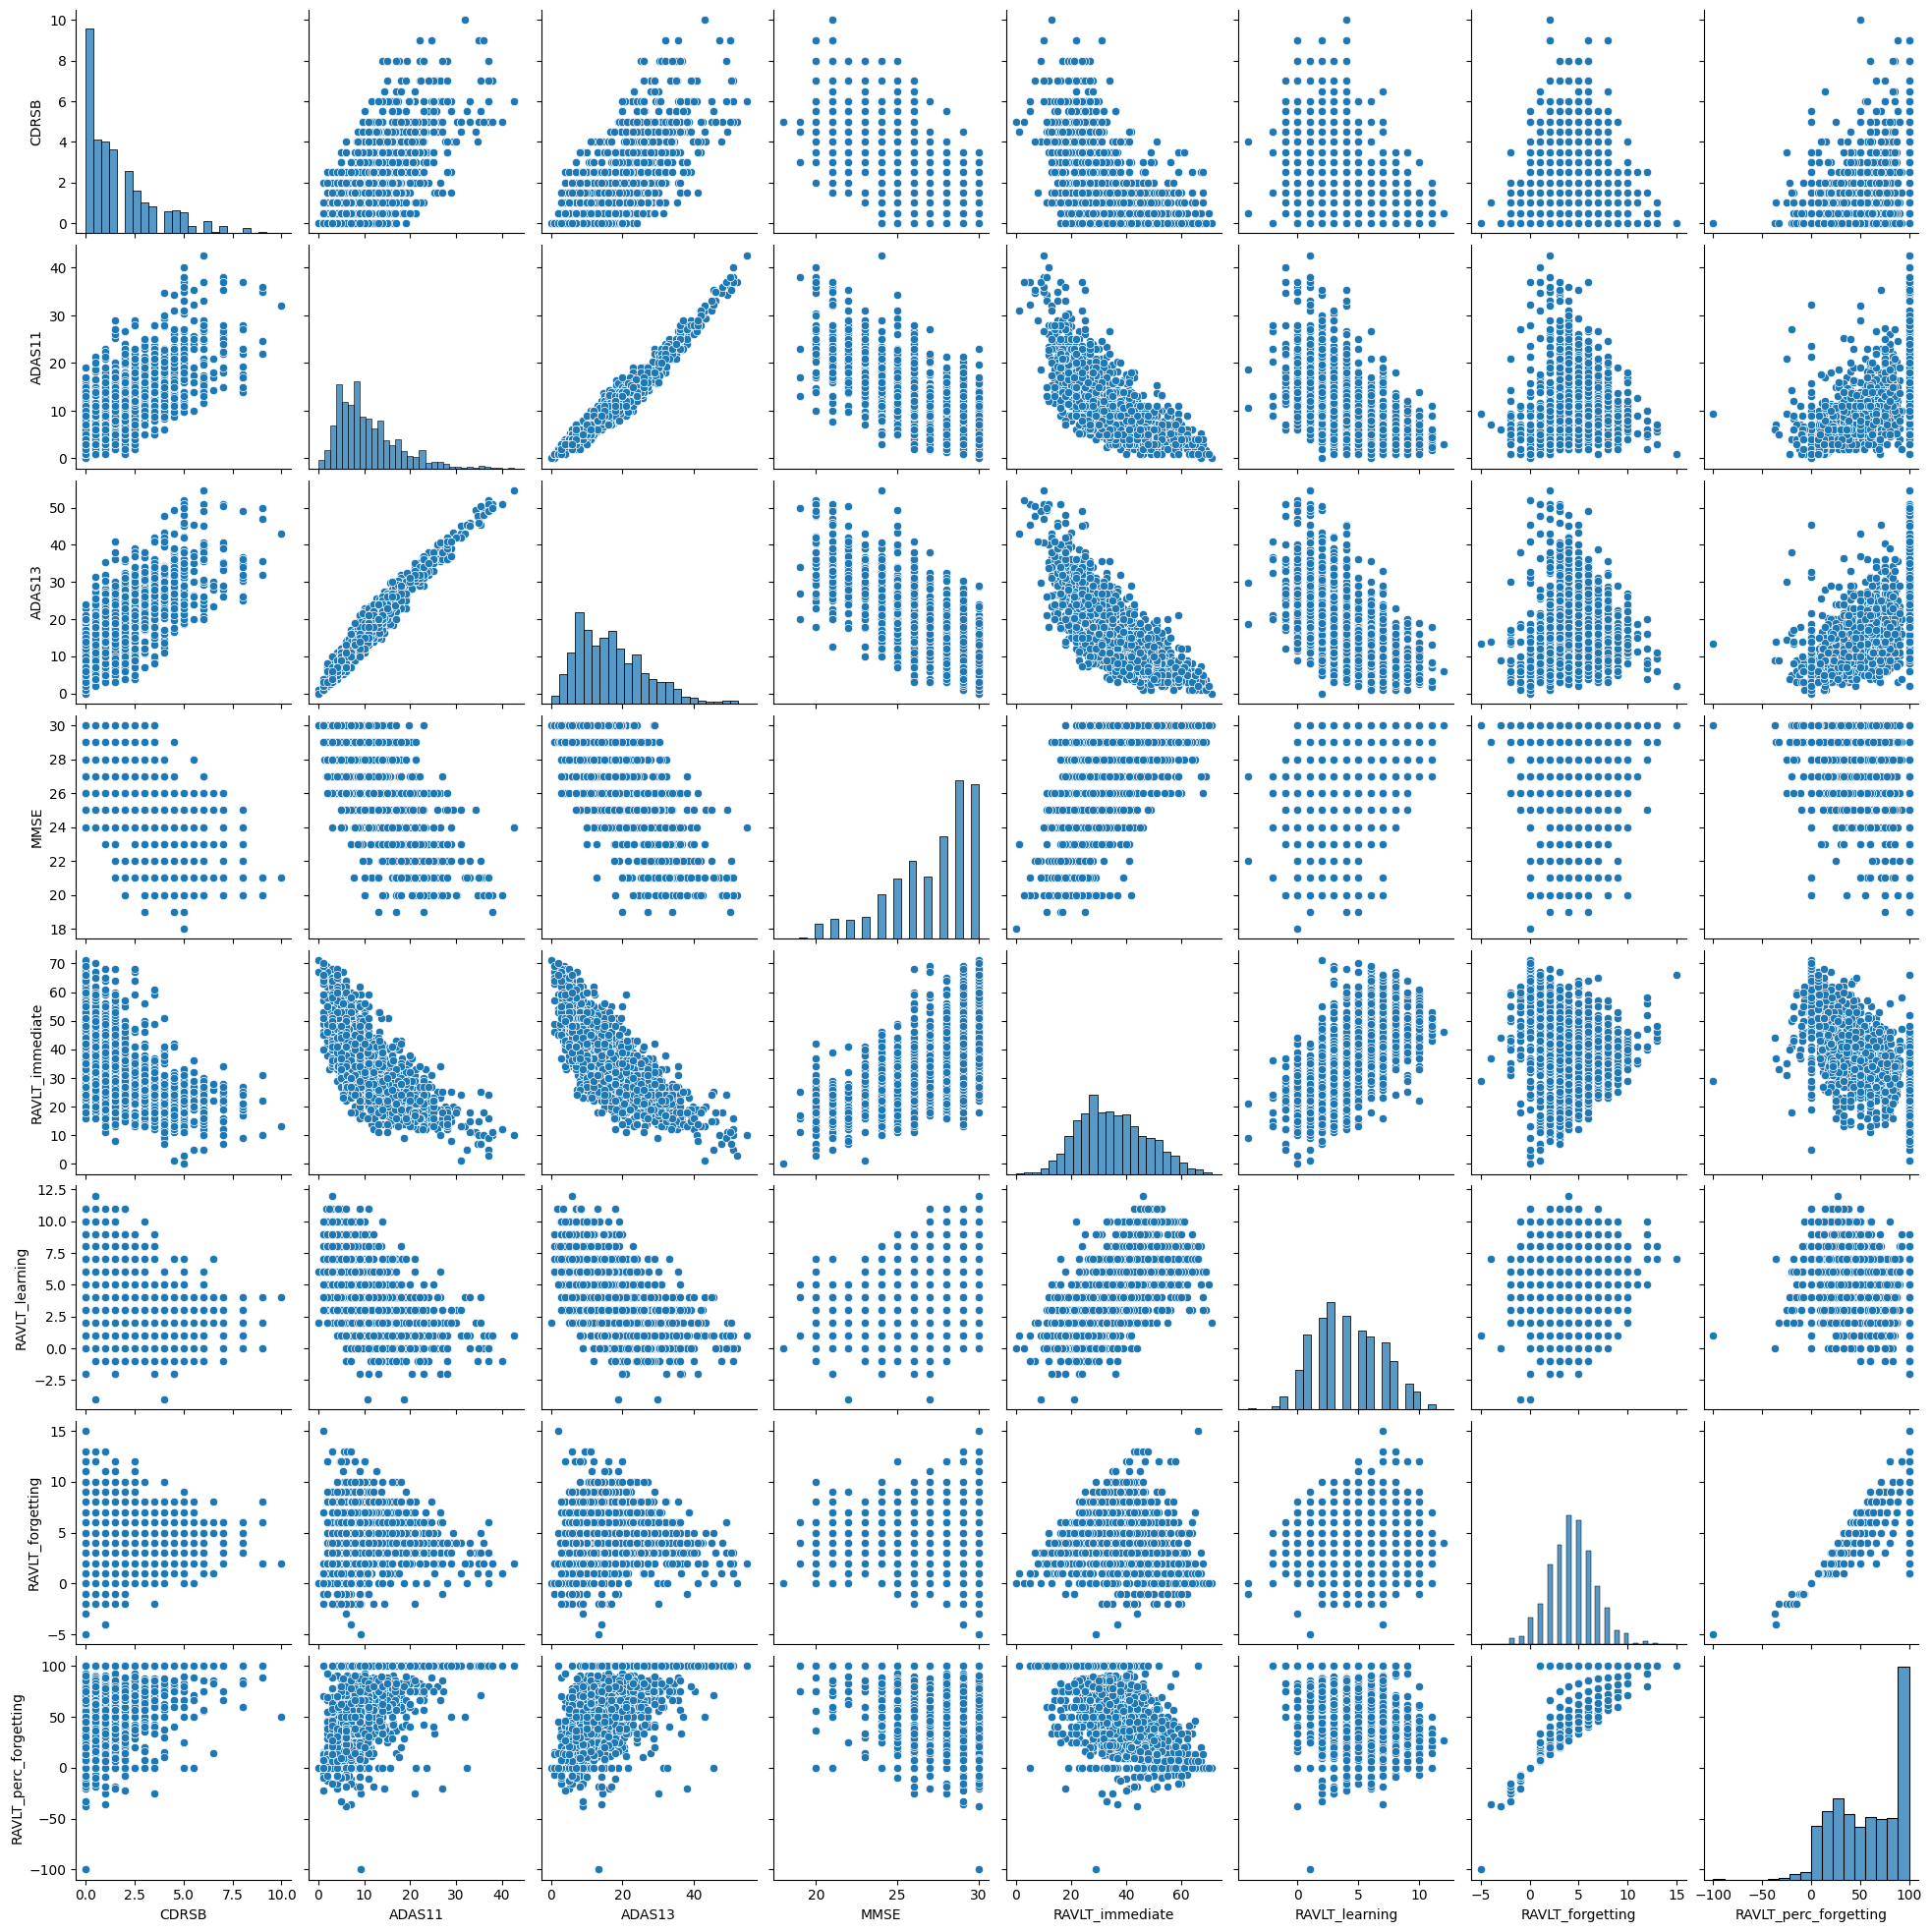

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns like RID and Test_data
numeric_df = cognitive_scores_df.drop(['RID', 'Test_data'], axis=1)

# Create a pair plot
sns.pairplot(numeric_df)
plt.show()


In [ ]:
# Drop unnamed columns
diagnosis_df = diagnosis_df.loc[:, ~diagnosis_df.columns.str.contains('^Unnamed')]

In [ ]:
X = pd.merge(cognitive_scores_df, data_df, on=['RID', 'Test_data'])
y = diagnosis_df['Diagnosis']

In [ ]:
y

0         CN
1         AD
2       LMCI
3         CN
4       LMCI
        ... 
1732     SMC
1733     SMC
1734     SMC
1735      CN
1736      AD
Name: Diagnosis, Length: 1737, dtype: object

In [ ]:
# Train-test split based on 'Test_Data' column
X_train = X[X['Test_data'] == 0].drop(columns='Test_data')
X_test = X[X['Test_data'] == 1].drop(columns='Test_data')
y_train = y[X['Test_data'] == 0]
y_test = y[X['Test_data'] == 1]

# Columns to one-hot encode
columns_to_encode = ['Gender', 'Year_education', 'Ethnicity', 'Race', 'Marital_status']

# Perform one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=columns_to_encode)
X_test_encoded = pd.get_dummies(X_test, columns=columns_to_encode)

# Display the shapes of the datasets
print("Shapes after preprocessing:")
print("X_train:", X_train_encoded.shape)
print("X_test:", X_test_encoded.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes after preprocessing:
X_train: (1390, 396)
X_test: (347, 392)
y_train: (1390,)
y_test: (347,)


In [ ]:
X_train_encoded

,RID,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,Age,...,Race_Black,Race_Hawaiian/Other PI,Race_More than one,Race_Unknown,Race_White,Marital_status_Divorced,Marital_status_Married,Marital_status_Never married,Marital_status_Unknown,Marital_status_Widowed
0,2,0.0,10.67,18.67,28,44.0,4.0,6.0,54.5455,74.3,...,0,0,0,0,1,0,1,0,0,0
1,3,4.5,22.00,31.00,20,22.0,1.0,4.0,100.0000,81.3,...,0,0,0,0,1,0,1,0,0,0
3,5,0.0,8.67,14.67,29,37.0,4.0,4.0,44.4444,73.7,...,0,0,0,0,1,0,1,0,0,0
4,6,0.5,18.67,25.67,25,30.0,1.0,5.0,83.3333,80.4,...,0,0,0,0,1,0,1,0,0,0
6,8,0.0,5.00,7.00,28,51.0,7.0,3.0,25.0000,84.5,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,5282,0.0,10.00,15.00,29,42.0,5.0,2.0,20.0000,66.9,...,0,0,0,0,1,0,1,0,0,0
1732,5287,0.5,3.00,4.00,29,50.0,10.0,4.0,26.6667,78.9,...,0,0,0,0,1,0,1,0,0,0
1733,5295,0.5,11.00,18.00,29,28.0,4.0,4.0,50.0000,75.5,...,0,0,0,0,1,0,1,0,0,0
1734,5296,0.0,9.00,14.00,29,38.0,2.0,6.0,75.0000,69.3,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean' or 'median' or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train_encoded)

# Transform the imputer on the test data
X_test_imputed = imputer.transform(X_test_encoded)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_imputed, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = rf_classifier.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.7982708933717579

Classification Report:
              precision    recall  f1-score   support

          AD       0.83      0.71      0.77        62
          CN       0.95      0.93      0.94        84
        EMCI       0.66      0.79      0.72        63
        LMCI       0.75      0.75      0.75       122
         SMC       1.00      0.81      0.90        16

    accuracy                           0.80       347
   macro avg       0.84      0.80      0.81       347
weighted avg       0.81      0.80      0.80       347


Confusion Matrix:
[[44  0  4 14  0]
 [ 1 78  1  4  0]
 [ 0  0 50 13  0]
 [ 8  2 20 92  0]
 [ 0  2  1  0 13]]


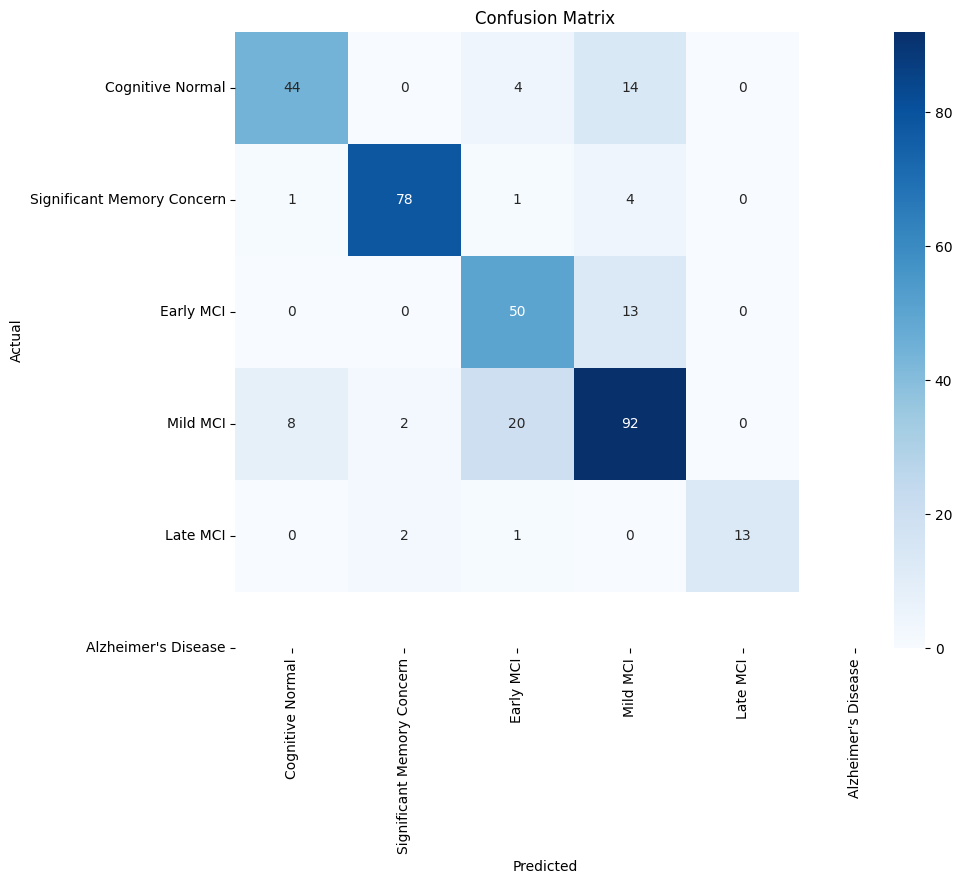

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cognitive Normal', 'Significant Memory Concern',
                         'Early MCI', 'Mild MCI', 'Late MCI', 'Alzheimer\'s Disease'],
            yticklabels=['Cognitive Normal', 'Significant Memory Concern',
                         'Early MCI', 'Mild MCI', 'Late MCI', 'Alzheimer\'s Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
